In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터의 확인과 검증셋

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [ ]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 3s 33ms/step - loss: 6.5642 - accuracy: 0.2504 - val_loss: 4.3119 - val_accuracy: 0.2446
Epoch 2/50
8/8 [===

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9415
Test accuracy: 0.9415384531021118


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [ ]:
# 모델 저장의 조건을 설정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/01-0.5715.hdf5

Epoch 2: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/02-0.7615.hdf5

Epoch 3: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/03-0.7862.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/04-0.8123.hdf5

Epoch 5: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/05-0.8169.hdf5

Epoch 6: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/06-0.7938.hdf5

Epoch 7: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/07-0.8185.hdf5

Epoch 8: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/08-0.8662.hdf5

Epoch 9: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/09-0.8862.hdf5

Epoch 10: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/10-0.9046.hdf5

Epoch 11: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/11-0.9169.hdf5

Epoch 12: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/12-0.9223.hdf5

Epoch 13: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/13-0.9277.hdf5

Epoch 14: saving model to /content/

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9477
Test accuracy: 0.947692334651947


## 3. 그래프로 과적합 확인하기

In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.125246,0.952271,0.127381,0.956154
1,0.123976,0.952528,0.123343,0.953077
2,0.123267,0.955094,0.122437,0.952308
3,0.124037,0.955863,0.122054,0.956154
4,0.119824,0.954580,0.121818,0.956923


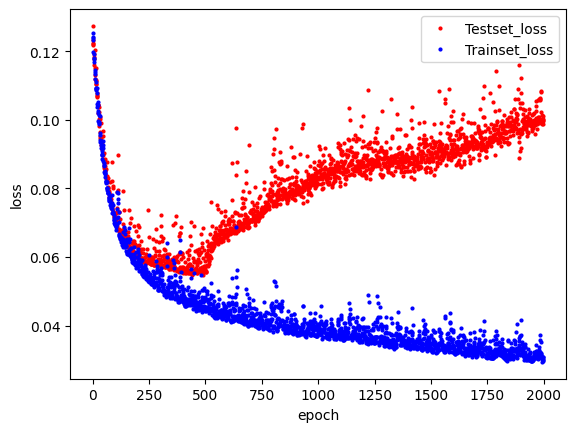

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 [==============================] - 2s 34ms/step - loss: 0.9687 - accuracy: 0.8219 - val_loss: 0.4242 - val_accuracy: 0.8815
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3802 - accuracy: 0.8817 - val_loss: 0.3970 - val_accuracy: 0.8623
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.8220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 12ms/step - loss: 0.3859 - accuracy: 0.8514 - val_loss: 0.3165 - val_accuracy: 0.8792
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3344 - accuracy: 0.8727 - val_loss: 0.3064 - val_accuracy: 0.8831
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3301 - accuracy: 0.8827 - val_loss: 0.3011 - val_accuracy: 0.9015
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3210 - accuracy: 0.9020 - val_loss: 0.2977 - val_accuracy: 0.9162
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3175 - accuracy: 0.9110 - val_loss: 0.2923 - val_accuracy: 0.9223
Epoch 8/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3141 - accuracy: 0.9148 - val_loss: 0.2901 - val_accuracy: 0.9262
Epoch 9/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3115 - accuracy: 0.9181 - val_loss: 0.2890 - val_accuracy: 0.9269
Epoch 10/2000
8/8 [=======

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9808
Test accuracy: 0.9807692170143127
